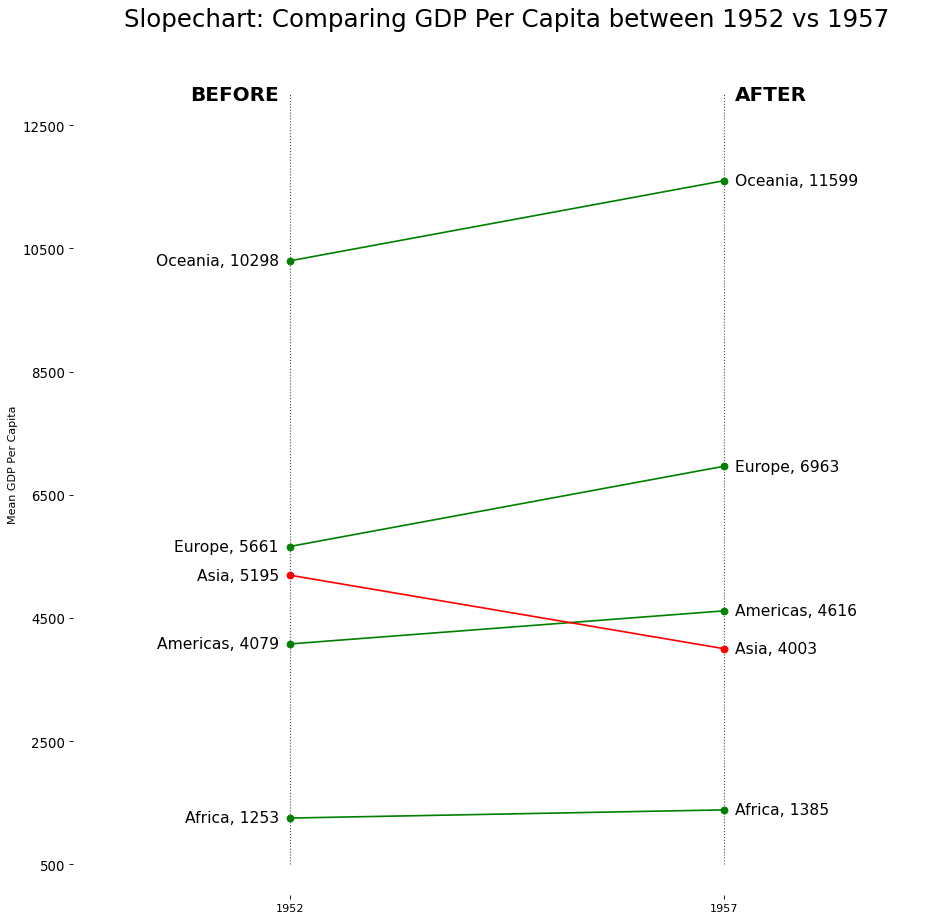

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
# Import Data
df = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")

left_label = [str(c) + ', ' + str(round(y))
              for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', ' + str(round(y))
               for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1,
         y2 in zip(df['1952'], df['1957'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941


def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]], color='red' if p1[1] -
                      p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l


fig, ax = plt.subplots(1, 1, figsize=(14, 14), dpi=80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black',
          alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black',
          alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]),
           s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]),
           s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1, p1], [3, p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right',
            verticalalignment='center', fontdict={'size': 14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left',
            verticalalignment='center', fontdict={'size': 14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right',
        verticalalignment='center', fontdict={'size': 18, 'weight': 700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left',
        verticalalignment='center', fontdict={'size': 18, 'weight': 700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957",
             fontdict={'size': 22})
ax.set(xlim=(0, 4), ylim=(0, 14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1, 3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()
